In [1]:
from pandas import *
from numpy import *

In [2]:
dt=read_csv('USA_Housing.csv');dt.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
X=dt[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]

In [4]:
y=dt['Price']

In [57]:
### RIDGE regression

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
x_tr,x_te,y_tr,y_te=train_test_split(X,y,test_size=0.3)

In [6]:
linridge=Ridge(alpha=15).fit(x_tr,y_tr)

In [10]:
print('intercep {} and coef. {}'.format(linridge.intercept_,linridge.coef_))

intercep -2641385.8490993963 and coef. [2.15579742e+01 1.64920396e+05 1.22162505e+05 1.53985235e+03
 1.51824719e+01]


In [11]:
print('R-squared train score: {:.3f}'.format(linridge.score(x_tr,y_tr)))
print('R-squared test score: {:.3f}'.format(linridge.score(x_te,y_te)))

R-squared train score: 0.918
R-squared test score: 0.917


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
from sklearn.linear_model import Ridge
x_tr,x_te,y_tr,y_te=train_test_split(X,y,random_state=0)

In [13]:
x_tr_s=scaler.fit_transform(x_tr)

In [14]:
x_te_s=scaler.transform(x_te)

In [18]:
linridge_s=Ridge(alpha=15).fit(x_tr_s,y_tr)

In [19]:
print('intercep {} and coef. {}'.format(linridge_s.intercept_,linridge_s.coef_))

intercep -561071.0124165497 and coef. [1314108.89166064  950672.38390115  657037.9383496    46321.6023517
  846553.74349894]


In [20]:
print('R-squared train score: {:.3f}'.format(linridge_s.score(x_tr_s,y_tr)))
print('R-squared test score: {:.3f}'.format(linridge_s.score(x_te_s,y_te)))

R-squared train score: 0.894
R-squared test score: 0.897


In [24]:
for i in [1,3,5,10,15,20,100]:
    linridge_s=Ridge(alpha=i).fit(x_tr_s,y_tr)
    R_tr=linridge_s.score(x_tr_s,y_tr)
    R_te=linridge_s.score(x_te_s,y_te)
    print('for i:{}, R-squared train score: {:.3f}, test score: {:.3f}'.format(str(i),R_tr,R_te))

for i:1, R-squared train score: 0.918, test score: 0.919
for i:3, R-squared train score: 0.917, test score: 0.918
for i:5, R-squared train score: 0.914, test score: 0.916
for i:10, R-squared train score: 0.906, test score: 0.908
for i:15, R-squared train score: 0.894, test score: 0.897
for i:20, R-squared train score: 0.879, test score: 0.883
for i:100, R-squared train score: 0.633, test score: 0.637


In [58]:
### LINEAR regression ###

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
scaler=MinMaxScaler()

In [26]:
x_tr,x_te,y_tr,y_te=train_test_split(X,y,random_state=0)
linreg=LinearRegression().fit(x_tr,y_tr)
print('R-squared train score: {:.3f}'.format(linreg.score(x_tr,y_tr)))
print('R-squared test score: {:.3f}'.format(linreg.score(x_te,y_te)))

R-squared train score: 0.918
R-squared test score: 0.919


In [27]:
poly=PolynomialFeatures(degree=2)
x_p=poly.fit_transform(X)

In [28]:
x_tr,x_te,y_tr,y_te=train_test_split(x_p,y,random_state=0)
linreg=LinearRegression().fit(x_tr,y_tr)
print('R-squared train score: {:.3f}'.format(linreg.score(x_tr,y_tr)))
print('R-squared test score: {:.3f}'.format(linreg.score(x_te,y_te)))

R-squared train score: 0.918
R-squared test score: 0.918


In [32]:
###KNN Regression###

In [33]:
data=read_csv('Ecommerce Customers')

In [34]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [35]:
X=data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=data['Yearly Amount Spent']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
x_tr,x_te,y_tr,y_te=train_test_split(X,y,test_size=.3)

In [37]:
for i in [1,3,5,10,20,50]:
    knnreg=KNeighborsRegressor(n_neighbors=i).fit(x_tr,y_tr)
    tr_s=knnreg.score(x_tr,y_tr)
    te_s=knnreg.score(x_te,y_te)
    print('for k={} train score {} and test score {}'. format(i,tr_s,te_s))

for k=1 train score 1.0 and test score 0.8649709865934508
for k=3 train score 0.9489063241758959 and test score 0.9018560152380886
for k=5 train score 0.9318852675873974 and test score 0.9018000414227161
for k=10 train score 0.9046024654267655 and test score 0.873026095887552
for k=20 train score 0.8577027934642176 and test score 0.8342983913816201
for k=50 train score 0.7479777786384958 and test score 0.7470219841054672


In [38]:
knnreg=KNeighborsRegressor(n_neighbors=5).fit(x_tr,y_tr)

In [39]:
pred=knnreg.predict(x_te)

In [41]:
from matplotlib.pyplot import *

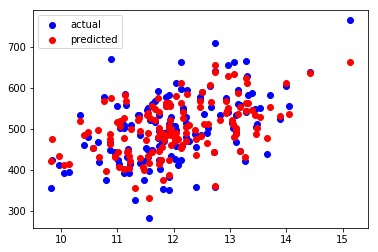

In [56]:
scatter(x_te['Time on App'],y_te,c='b',label='actual')
scatter(x_te['Time on App'],pred,c='r',label='predicted');legend()
